In [1]:
import pylhe
import ROOT
import math
import os
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
import xlrd

Welcome to JupyROOT 6.20/04


In [2]:
#ma<25 ma>25 all define


def file_np(file):
    event = [ file["Delphes;1"]["Electron"].array(),
              file["Delphes;1"]["Electron.PT"].array(),
              file["Delphes;1"]["Electron.Eta"].array(),
              file["Delphes;1"]["Electron.Phi"].array(),
              file["Delphes;1"]["Muon"].array(),                #4
              file["Delphes;1"]["Muon.PT"].array(),
              file["Delphes;1"]["Muon.Eta"].array(),
              file["Delphes;1"]["Muon.Phi"].array(),
              file["Delphes;1"]["Photon"].array(),              #8
              file["Delphes;1"]["Photon.PT"].array(),
              file["Delphes;1"]["Photon.Eta"].array(),
              file["Delphes;1"]["Photon.Phi"].array(),
              file["Delphes;1"]["MissingET"].array(),           #12
              file["Delphes;1"]["MissingET.fUniqueID"].array(),   
              file["Delphes;1"]["MissingET.fBits"].array(),
              file["Delphes;1"]["MissingET.MET"].array(),
              file["Delphes;1"]["MissingET.Eta"].array(),
              file["Delphes;1"]["MissingET.Phi"].array(),
              file["Delphes;1"]["Jet"].array(),                 #18
              file["Delphes;1"]["Jet.EhadOverEem"].array(),     
              file["Delphes;1"]["Jet.Mass"].array(),
              file["Delphes;1"]["Event.Number"].array(),
              file["Delphes;1"]["Jet.Tau[5]"].array(),
              file["Delphes;1"]["Event.CrossSection"].array()
              ]
    
    event = np.expand_dims(event, axis=-1)    ### reshape data
    event = event.transpose((1,0,2))
    event = np.squeeze(event,axis=(2,))
    return event 

################################################

def prlen(events):
    print(len(events))

    
###############################################  simple sel (any=? l=1 j>1)

def num_sl(event,lab,num):
    where1 = np.where(event[:,lab]==num)
    return event[where1]

def l_sl(event):
    where1 = np.where(event[:,0]+event[:,4]==1)
    return event[where1]

def j_sl(event):
    where1 = np.where(event[:,18]>0)
    return(event[where1])  

def Ehover(event,sl_jet):
    where=[]
    for i in range(len(event)):
        if np.min(event[i][19])<0.2:
            where.append(i)
            sl_jet.append(np.min(event[i][19]))
    return event[where]   
       
################################################  maa caculate
def m_aa(events, m, pt1):
    where1=[]   
    for i in range(len(events)):
        p = [0,0,0,0] 
        for j in range(events[i][8]):
            pt = events[i][9][j]   
            eta = events[i][10][j]  
            phi = events[i][11][j]    
            p[1] = p[1] + pt*np.cos(phi)    ### px
            p[2] = p[2] + pt*np.sin(phi)    ### py
            p[3] = p[3] + pt*np.sinh(eta)   ### pz
            p[0] = p[0] + np.sqrt( (pt*np.cos(phi))**2 + (pt*np.sin(phi))**2 + (pt*np.sinh(eta))**2 )     
        maa = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        m.append(maa)
        pTaa = np.sqrt(p[1]**2 + p[2]**2)
        pt1.append(pTaa)
        if max_d<maa<max_u:
            where1.append(i)
    return events[where1]
################################################        
def pt_sl(events):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]    
        for j in range(events[i][8]):
            pt = events[i][9][j]    
            eta = events[i][10][j]    
            phi = events[i][11][j]   
            p[1] = p[1] + pt*np.cos(phi)    ### px
            p[2] = p[2] + pt*np.sin(phi)    ### py
        pTaa = np.sqrt(p[1]**2 + p[2]**2)    
        if pTaa>50:
              where1.append(i)
    return events[where1]
################################################
def mvl_sl(events,m):
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 + (pt1*np.sinh(eta1))**2)+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 + (pt2*np.sinh(eta2))**2)
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 + (pt1*np.sinh(eta1))**2)+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 + (pt2*np.sinh(eta2))**2)
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 - p[3]**2)
        m.append(mlv)
################################################## must 1l events
def MTvl_sl(events,m,pt):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2)
            mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 )
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        
        m.append(mlv)
        pt.append(ptlv)
        if mlv > 58:
            where1.append(i)
    return(events[where1])
##################################################   
def PTvl_sl(events,m,pt):
    where1=[]
    for i in range(len(events)):
        p = [0,0,0,0]
        if events[i][0]==1:
            pt1  = events[i][1][0]    
            eta1 = events[i][2][0]    
            phi1 = events[i][3][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(me**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2)
            mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        elif events[i][4]==1 :
            pt1  = events[i][5][0]    
            eta1 = events[i][6][0]    
            phi1 = events[i][7][0]
            pt2  = events[i][15][0]    
            eta2 = events[i][16][0]    
            phi2 = events[i][17][0]
            
            p[1] = pt1*np.cos(phi1) + pt2*np.cos(phi2)    ### px
            p[2] = pt1*np.sin(phi1) + pt2*np.sin(phi2)    ### py
            p[3] = pt1*np.sinh(eta1)+ pt2*np.sinh(eta2)   ### pz
            p[0] = np.sqrt(mu**2 + (pt1*np.cos(phi1))**2 + (pt1*np.sin(phi1))**2 )+np.sqrt((pt2*np.cos(phi2))**2 + (pt2*np.sin(phi2))**2 )
            mlv = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
            ptlv = np.sqrt(p[1]**2 + p[2]**2 )
        m.append(mlv)
        pt.append(ptlv)
        if ptlv > 50:
            where1.append(i)
    return(events[where1])
########################################################################################
def significance(s,b):   ### t = (sigma b)^2
    t = (b*0.1)**2
    g = 2*((s+b)*np.log((s+b)*(b+t)/(b**2+(s+b)*t))-((b**2)/t)*np.log(1+(t*s/(b*(b+t)))))
    return np.sqrt(g)

def signif_short(s,b):
    return np.sqrt(2*((s+b)*np.log(1+s/b)-s))

########################################################################################
def z_2(f, left, right, epsilon=1e-12):
    if left >= right:
        return None

    while abs(right - left) > epsilon:
        mid = (left + right) / 2
        f_mid = f(mid,b)-2
        if f_mid == 0:
            return mid
        elif f_mid < 0:
            left = mid
        elif f_mid > 0:
            right = mid

    return (left + right) / 2



####################################################################################################
def j_mass(events,j_mass):
    where = []
    for i in range(len(events)):
        where1 = np.where(events[i][19]==np.min(events[i][19]))
        for j in range(len(where1[0])):
            jet_m = events[i][20][where1[0][j]]
            j_mass.append(jet_m)
            where.append(i)  
    c = np.unique(where)
    return events[c]


##################################################
def j_mass_sl(events,j_mass):
    where = []
    for i in range(len(events)):
        where1 = np.where(events[i][19]==np.min(events[i][19]))
        for j in range(len(where1[0])):
            jet_m = events[i][20][where1[0][j]]
            if max_d<jet_m<max_u:
                j_mass.append(jet_m)
                where.append(i)  
    if not where:
        c = []
    else:
        c = np.unique(where)
    return events[c]
#######################################################################################
def draw_tau2overtau1(events,tau2overtau1):
    for i in range(len(events)):
        where1 = np.where(events[i][19]==np.min(events[i][19]))
        for j in range(len(where1[0])):
            tau1 = events[i][22][where1[0][j]][0]
            tau2 = events[i][22][where1[0][j]][1]
            if tau1 != 0 :
                tau2overtau1.append(tau2/tau1)
                
def tau2overtau1_sl(events):
    where = []
    for i in range(len(events)):
        where1 = np.where(events[i][19]==np.min(events[i][19]))
        for j in range(len(where1[0])):
            tau1 = events[i][22][where1[0][j]][0]
            tau2 = events[i][22][where1[0][j]][1]
            if tau1 != 0 :
                if tau2/tau1<0.05:
                    where.append(i)
    return events[where]
                               
########################################################################################





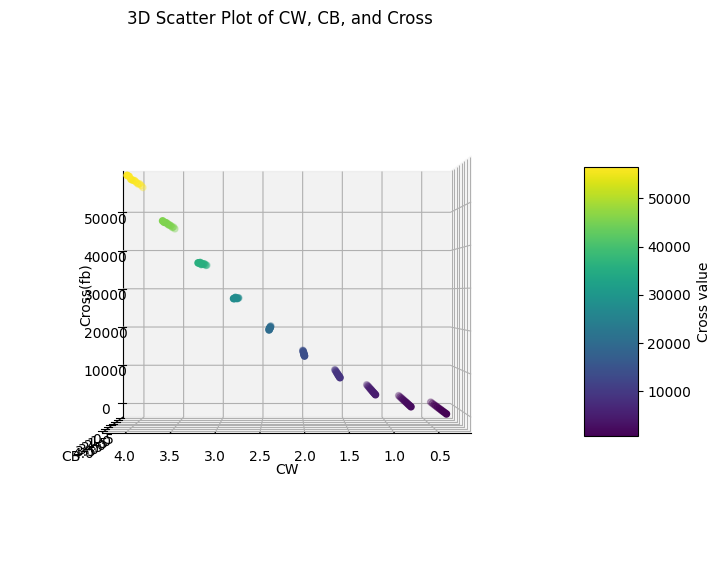

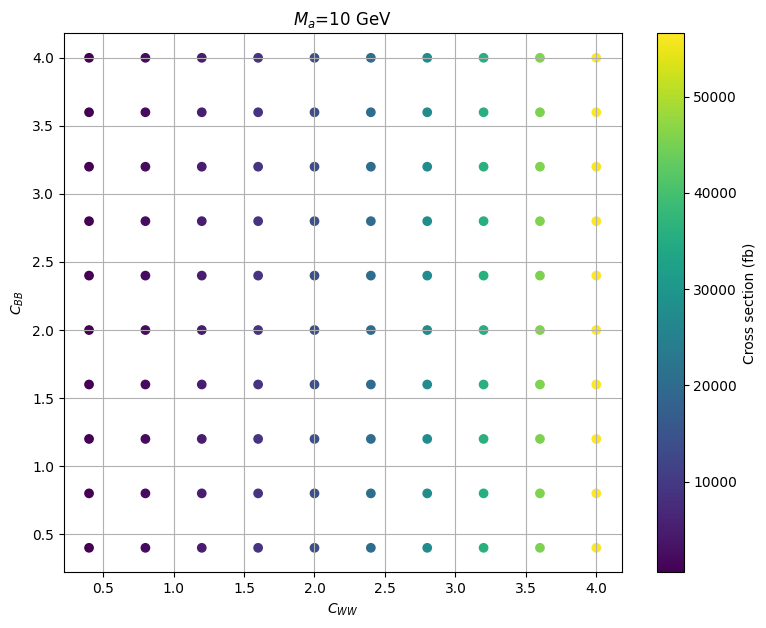

[561.6750999999999, 563.2671, 563.0971000000001, 563.9248, 564.3065, 563.889, 564.0125, 560.7854, 565.0087, 563.4426, 2250.366, 2245.534, 2250.749, 2249.088, 2250.6, 2245.8469999999998, 2263.3109999999997, 2245.1780000000003, 2247.317, 2246.3199999999997, 5076.159, 5064.388, 5092.3150000000005, 5072.678, 5050.27, 5082.655, 5047.489, 5059.308, 5059.032, 5061.569, 8991.435, 9061.163, 9030.412, 9043.141, 9023.778, 8997.636, 9045.337, 9015.551, 9030.071, 9047.318000000001, 14044.52, 14025.49, 14148.78, 14173.12, 14087.460000000001, 14096.3, 14146.779999999999, 14071.06, 14086.59, 14109.94, 20364.02, 20264.27, 20240.760000000002, 20213.79, 20407.57, 20266.28, 20204.160000000003, 20365.46, 20282.489999999998, 20212.74, 27603.02, 27660.99, 27568.11, 27443.44, 27581.95, 27577.18, 27808.81, 27573.72, 27565.100000000002, 27557.600000000002, 36107.78, 35975.95, 36132.840000000004, 36219.39, 36006.83, 36099.87, 35786.17, 36179.51, 35953.71, 35908.35, 45544.649999999994, 45798.380000000005, 45532.9

In [23]:
file_path = '/data/event/sg10_scan_cwcb04_40/Events/scan_run_[01-100].txt'


X_section100 = []


with open(file_path, 'r') as file:
    lines = file.readlines()  # 讀取所有行

    #  'cross' 
    header = lines[0].split()
    cross_index = header.index('cross')

    # 提取 'cross' 數據到列表
    for line in lines[1:]:
        values = line.split()
        cross_value = float(values[cross_index])
        X_section100.append(cross_value*1000)
####################################################        
cw_start = 0.4
cb_start = 0.4


runs = {}

for i in range(10):
    cw = cw_start + 0.4 * i
    for j in range(10):
        cb = cb_start + 0.4 * j
        run_label = i * 10 + j + 1
        runs[run_label] = [cw, cb]  
####################################################
        


from mpl_toolkits.mplot3d import Axes3D


cw_values = [runs[key][0] for key in sorted(runs)]
cb_values = [runs[key][1] for key in sorted(runs)]




fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(cw_values, cb_values, X_section100, c=X_section100, cmap='viridis')
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('Cross value')

ax.set_xlabel('CW')
ax.set_ylabel('CB')
ax.set_zlabel('Cross(fb)')

ax.set_title('3D Scatter Plot of CW, CB, and Cross')
ax.view_init(elev=0, azim=90)
plt.show

plt.figure(figsize=(9, 7))                                                   
scatter = plt.scatter(cw_values, cb_values, c=X_section100, cmap='viridis')
bar = plt.colorbar(scatter)
bar.set_label('Cross section (fb)')
plt.title(r"$M_{a}$=10 GeV")
plt.xlabel(r"$C_{WW}$")
plt.ylabel(r"$C_{BB}$")
plt.grid(True)
plt.show()

print(X_section100)
print(runs)

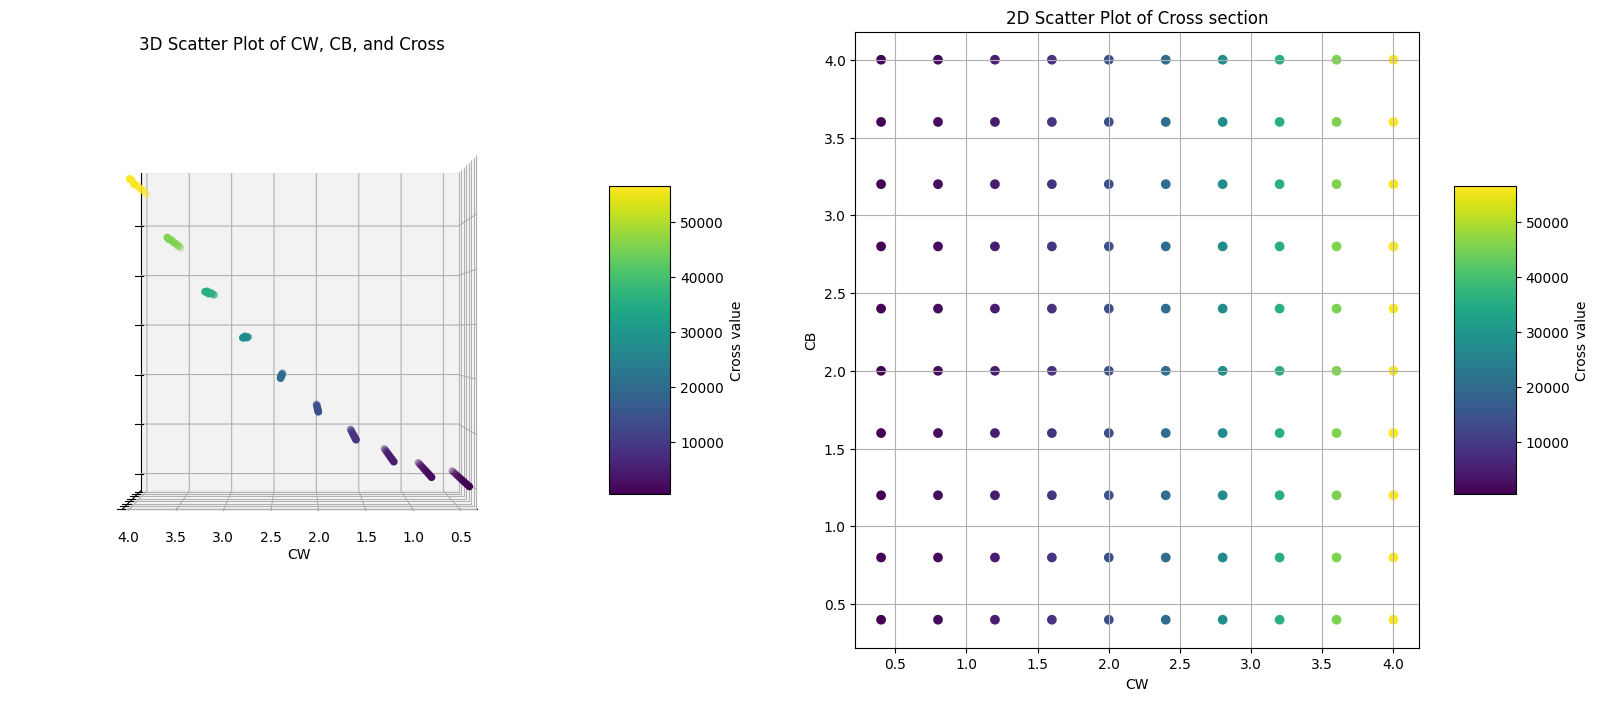

In [4]:
fig = plt.figure(figsize=(20, 8))

# 生成3D散点图
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(cw_values, cb_values, X_section100, c=X_section100, cmap='viridis')
cbar1 = fig.colorbar(scatter1, ax=ax1, shrink=0.5, aspect=5)
cbar1.set_label('Cross value')

ax1.set_xlabel('CW')
ax1.set_title('3D Scatter Plot of CW, CB, and Cross')

# 设置视角，从正X轴方向看去，并删除cb轴和z轴标示
ax1.view_init(elev=0, azim=90)
ax1.yaxis.set_visible(False)
ax1.zaxis.set_visible(False)
ax1.set_yticklabels([])
ax1.set_zticklabels([])

ax1.set_box_aspect([1, 1, 1])  # 设置3D图的比例为1:1:0.5
ax1.margins(x=0, y=0)  # 设置图的边距为0

# 生成2D散点图
ax2 = fig.add_subplot(122)
scatter2 = ax2.scatter(cw_values, cb_values, c=X_section100, cmap='viridis')
cbar2 = fig.colorbar(scatter2, ax=ax2, shrink=0.5, aspect=5)
cbar2.set_label('Cross value')
ax2.set_title('2D Scatter Plot of Cross section')
ax2.set_xlabel('CW')
ax2.set_ylabel('CB')
ax2.grid(True)

plt.show()


In [5]:
from tqdm import tqdm
############################################ chose the point

m_axlist = [100,80,65,50,40,30]
x_seclist = [4584, 5583, 6640, 7858, 8969, 10220]

###################### fa,gaww

fa_limt_300 = []
fa_limt_3000 = []
gaww_limt_300 = []
gaww_limt_3000 = []

s_fa_limt_300 = []
s_fa_limt_3000 = []
s_gaww_limt_300 = []
s_gaww_limt_3000 = []

######################################## s = sg_Xsection*(sgsl_event/sgNsl_event)*Lum[k]             
s_list_300 = []     
s_list_3000 = []
b1_list_300 = []
b1_list_3000 = []
b2_list_300 = []
b2_list_3000 = []
b_list_300 = []
b_list_3000 = []


select_rate_300 = []
select_rate_3000 = []
#######################################################################################change for different cwcb scan
###run_odd  ma=10Gev  CW0.1 - 1.1
###run_even ma=100Gev CW0.1 - 1.1
C_W_start = 0.4
C_B_start = 0.4

bg_file = uproot.open("/data/event/final/bg_ppaalvll/Events/run_01/tag_1_delphes_events.root")
bg_events = file_np(bg_file)
bg_jet_file = uproot.open("/data/event/final/bgjet_pplvllj/Events/run_01/tag_1_delphes_events.root")
j_events = file_np(bg_jet_file)
#進度條
total_runs = 100
with tqdm(total=100, desc="Processing runs", unit="run") as pbar:
    for p in range(10):

        C_W = C_W_start + 0.4 * p
        for r in range(10):

            pbar.update(1)

            C_B = C_B_start + 0.4 * r
            
            run_number = p * 10 + r + 1
            sg_file = uproot.open(f"/data/event/sg10_scan_cwcb04_40/Events/run_{run_number:02}/tag_1_delphes_events.root") 

            m_ax = 10
            sg_Xsection = X_section100[ p * 10 + r ]   #fb = pb*1000
            bg_Xsection = 94.37
            j_Xsection = 5887000
            
            # bg_x : 94.37
            # sg_x : 100(4584) 90(5059) 80(5583) 70(6252) 60(6998) 50(7858) 40(8969) 30(10220) |25(10890)

            sg_events = file_np(sg_file)
#######################################################################################            
         ###########################################################
            me = 0.000511
            mu = 0.10566
    
    
            max_shift = m_ax*0.1
            if m_ax == 1:
                max_u = 2
                max_d = 0.5
            else:
                max_u = m_ax + 2*max_shift
                max_d = m_ax - max_shift    
            ###########################################################

            jEho_sg_1j_Eho=[]
            jEho_bg_1j_Eho=[]
            jEho_j_1j_Eho=[]


            ############################# MT PT
            MTv_sgsl_1j_Eho_1l = []
            MTv_bgsl_1j_Eho_1l = []
            MTv_jsl_1j_Eho_1l = []

            PTv_sgsl_1j_Eho_1l = []
            PTv_bgsl_1j_Eho_1l = []
            PTv_jsl_1j_Eho_1l = []

            ###################################################sl: 1j -> Eho<0.2 -> 1l
            sgsl_1j = j_sl(sg_events)
            sgsl_1j_Eho = Ehover(sgsl_1j,jEho_sg_1j_Eho)
            sgsl_1j_Eho_1l = l_sl(sgsl_1j_Eho)

            bgsl_1j = j_sl(bg_events)
            bgsl_1j_Eho = Ehover(bgsl_1j,jEho_bg_1j_Eho)
            bgsl_1j_Eho_1l = l_sl(bgsl_1j_Eho)

            jsl_1j = j_sl(j_events)
            jsl_1j_Eho = Ehover(jsl_1j,jEho_j_1j_Eho)
            jsl_1j_Eho_1l = l_sl(jsl_1j_Eho)
            ####################################################sl: 8<jmass<15  ***************************************************************


            sgsl_1j_Eho_1l_MT = MTvl_sl(sgsl_1j_Eho_1l,MTv_sgsl_1j_Eho_1l,PTv_sgsl_1j_Eho_1l)
            bgsl_1j_Eho_1l_MT = MTvl_sl(bgsl_1j_Eho_1l,MTv_bgsl_1j_Eho_1l,PTv_bgsl_1j_Eho_1l)
            jsl_1j_Eho_1l_MT = MTvl_sl(jsl_1j_Eho_1l,MTv_jsl_1j_Eho_1l,PTv_jsl_1j_Eho_1l)
            ####################################################

            sgsl_1j_Eho_1l_MT_t21 = tau2overtau1_sl(sgsl_1j_Eho_1l_MT)
            bgsl_1j_Eho_1l_MT_t21 = tau2overtau1_sl(bgsl_1j_Eho_1l_MT)
            jsl_1j_Eho_1l_MT_t21 = tau2overtau1_sl(jsl_1j_Eho_1l_MT)

            ####################################################

            jmass_sgsl_1j_Eho_1l_MT_t21=[]
            jmass_sgsl_1j_Eho_1l_MT_t21=[]
            jmass_jsl_1j_Eho_1l_MT_t21=[]

            sgsl_1j_Eho_1l_MT_t21_jm = j_mass_sl(sgsl_1j_Eho_1l_MT_t21,jmass_sgsl_1j_Eho_1l_MT_t21)
            bgsl_1j_Eho_1l_MT_t21_jm = j_mass_sl(bgsl_1j_Eho_1l_MT_t21,jmass_sgsl_1j_Eho_1l_MT_t21)
            jsl_1j_Eho_1l_MT_t21_jm = j_mass_sl(jsl_1j_Eho_1l_MT_t21,jmass_jsl_1j_Eho_1l_MT_t21)


            ####################################################
            sgsl_event = len(sgsl_1j_Eho_1l_MT_t21_jm)
            bgsl_event = len(bgsl_1j_Eho_1l_MT_t21_jm)
            jsl_event = len(jsl_1j_Eho_1l_MT_t21_jm)

            bgNsl_event = len(bg_events)
            sgNsl_event = len(sg_events)
            jNsl_event = len(j_events)

            fa = 1000
            sin_w_2 = 0.22290
            cos_w_2 = 1 - sin_w_2

            Lum = [300,3000]
#             print('\033[0;31mMa :\033[0m',m_ax)
#             print('\033[0;31mCW :\033[0m',C_W)
#             print('\033[0;33msg sl :\033[0m',len(sgsl_1j_Eho_1l_MT_t21_jm))
#             print('\033[0;34mbg sl :\033[0m',len(bgsl_1j_Eho_1l_MT_t21_jm))
#             print('\033[0;35mbg sl :\033[0m',len(jsl_1j_Eho_1l_MT_t21_jm))

        ####################################################################################   long z
            for k in range(len(Lum)):

                s = sg_Xsection*(sgsl_event/sgNsl_event)*Lum[k]
                b1 = bg_Xsection*(bgsl_event/bgNsl_event)*Lum[k]
                b2 = j_Xsection*(jsl_event/jNsl_event)*Lum[k]
                b = b1 + b2
        #########################################################        
                if k == 0:
#                     print('**************************************')
#                     print('\033[0;33ms_300 :\033[0m',s)
#                     print('\033[0;34mb_300 :\033[0m',b)
                    s_list_300.append(s)
                    b1_list_300.append(b1)
                    b2_list_300.append(b2)
                    b_list_300.append(b)
                    select_rate_300.append(sgsl_event/sgNsl_event)
                elif k == 1:
#                     print('**************************************')
#                     print('\033[0;33ms_3000 :\033[0m',s)
#                     print('\033[0;34mb_3000 :\033[0m',b)
                    s_list_3000.append(s)
                    b1_list_3000.append(b1)
                    b2_list_3000.append(b2)    
                    b_list_3000.append(b)
                    select_rate_3000.append(sgsl_event/sgNsl_event)
        #########################################################        
                if b == 0  :                                             ###################   if jet_bg and bg are zero
                    exp_s = 3
                    exp_sg_Xsection = (exp_s*sg_Xsection/s)
#                     print('\033[0;34mLuminosity:',Lum[k],'\033[0m')
#         #             print('sg_Xsection:',sg_Xsection)
#         #             print('z:nan')
#         #             print('exp_z:nan')
#                     print('exp_s:',exp_s)
#         #             print('exp_sg_Xsection:',exp_sg_Xsection)

                    fa_limit = fa*np.sqrt(sg_Xsection/exp_sg_Xsection)
                    gaww_limt = (4*C_W)/fa_limit

                    if k == 0:
                        fa_limt_300.append(fa_limit)
                        gaww_limt_300.append(gaww_limt)
                    elif k == 1:
                        fa_limt_3000.append(fa_limit)
                        gaww_limt_3000.append(gaww_limt)
#                     print('fa_limit',fa_limit)
#                     print('gaww_limt',gaww_limt)

                else:
                    i = 0
                    while True:
                        if significance(i, b) - 2 > 0:
                            max_n = i
        #                     print('near z:', significance(i, b), 'i:', i)
                            break
                        i += 1

                    max_n = max_n        
                    min_n = max_n-1

                    exp_s = z_2(significance, min_n, max_n,epsilon=1e-5)   #-5   /  -12
                    if exp_s<3:
                        exp_s = 3
                    exp_sg_Xsection = (exp_s*sg_Xsection/s)

#                     print('\033[0;34mLuminosity:',Lum[k],'\033[0m')
#         #             print('sg_Xsection:',sg_Xsection)
#         #             print('z:',significance(s,b))
#         #             print('exp_z:',significance(exp_s,b))
#                     print('exp_s:',exp_s)
#         #             print('exp_sg_Xsection:',exp_sg_Xsection)

                    fa_limit = fa*np.sqrt(sg_Xsection/exp_sg_Xsection)
                    gaww_limt = (4*C_W)/fa_limit

                    if k == 0:
                        fa_limt_300.append(fa_limit)
                        gaww_limt_300.append(gaww_limt)
                    elif k == 1:
                        fa_limt_3000.append(fa_limit)
                        gaww_limt_3000.append(gaww_limt)
#                     print('fa_limit',fa_limit)
#                     print('gaww_limt',gaww_limt)
#             print('**************************************')
        ####################################################################################  short z
            for k in range(len(Lum)):
                s=0
                b1=0
                b2=0
                b3=0

                s = sg_Xsection*(sgsl_event/sgNsl_event)*Lum[k]
                b1 = bg_Xsection*(bgsl_event/bgNsl_event)*Lum[k]
                b2 = j_Xsection*(jsl_event/jNsl_event)*Lum[k]
                b = b1 + b2

                if b == 0  :                                             ###################  if jet_bg and bg are zero
                    exp_s = 3
                    exp_sg_Xsection = (exp_s*sg_Xsection/s)
                    print('\033[0;34mshort_sign-Luminosity:',Lum[k],'\033[0m')
        #             print('sg_Xsection:',sg_Xsection)
        #             print('z:nan')
        #             print('exp_z:nan')
                    print('exp_s:',exp_s)
        #             print('exp_sg_Xsection:',exp_sg_Xsection)

                    fa_limit = fa*np.sqrt(sg_Xsection/exp_sg_Xsection)
                    gaww_limt = (4*C_W)/fa_limit

                    if k == 0:
                        s_fa_limt_300.append(fa_limit)
                        s_gaww_limt_300.append(gaww_limt)
                    elif k == 1:
                        s_fa_limt_3000.append(fa_limit)
                        s_gaww_limt_3000.append(gaww_limt)
#                     print('fa_limit',fa_limit)
#                     print('gaww_limt',gaww_limt)

                else:
                    i = 0
                    while True:
                        if signif_short(i, b) - 2 > 0:
                            max_n = i
        #                     print('near z:', significance(i, b), 'i:', i)
                            break
                        i += 1

                    max_n = max_n        
                    min_n = max_n-1

                    exp_s = z_2(signif_short, min_n, max_n,epsilon=1e-5)   #-5   /  -12
                    exp_sg_Xsection = (exp_s*sg_Xsection/s)
                    if exp_s<3:
                        exp_s = 3

#                     print('\033[0;34mshort_sign-Luminosity:',Lum[k],'\033[0m')
#         #             print('sg_Xsection:',sg_Xsection)
#         #             print('z:',significance(s,b))
#         #             print('exp_z:',significance(exp_s,b))
#                     print('exp_s:',exp_s)
#         #             print('exp_sg_Xsection:',exp_sg_Xsection)

                    fa_limit = fa*np.sqrt(sg_Xsection/exp_sg_Xsection)
                    gaww_limt = (4*C_W)/fa_limit

                    if k == 0:
                        s_fa_limt_300.append(fa_limit)
                        s_gaww_limt_300.append(gaww_limt)
                    elif k == 1:
                        s_fa_limt_3000.append(fa_limit)
                        s_gaww_limt_3000.append(gaww_limt)
#                     print('fa_limit',fa_limit)
#                     print('gaww_limt',gaww_limt)
#             print('********************************************************************')


Processing runs:  35%|██████████████████████▍                                         | 35/100 [04:01<08:00,  7.39s/run]/tmp/ipykernel_26788/2329522649.py:147: RuntimeWarning: invalid value encountered in sqrt
  mlv  = np.sqrt(p[0]**2 - p[1]**2 - p[2]**2 )
Processing runs: 100%|███████████████████████████████████████████████████████████████| 100/100 [11:35<00:00,  6.96s/run]


In [6]:
# print(fa_limt_300)
print(gaww_limt_300)

[2.188910288929639e-05, 2.2244327989926403e-05, 2.1318042799202525e-05, 2.1965099186352813e-05, 2.146221017104414e-05, 2.2087491526089945e-05, 2.176498272438712e-05, 2.1788364827812202e-05, 2.138349046208458e-05, 2.1329885655301107e-05, 2.1831753628235018e-05, 2.176700497487428e-05, 2.1673966217809962e-05, 2.155766029903417e-05, 2.1752231974642065e-05, 2.155426090384426e-05, 2.2090565211629084e-05, 2.227293665640401e-05, 2.251701193020519e-05, 2.2143106375361662e-05, 2.188327855823412e-05, 2.1741337990805307e-05, 2.185847520507936e-05, 2.2051749527570034e-05, 2.2029602752145652e-05, 2.1177857308942025e-05, 2.1975326449342245e-05, 2.1713407045799638e-05, 2.188054271259565e-05, 2.1924763264686635e-05, 2.2074237084404984e-05, 2.1769542111155697e-05, 2.192573871101859e-05, 2.182081103749621e-05, 2.2178192041050874e-05, 2.1836397240510514e-05, 2.2162094966486686e-05, 2.2044693755687217e-05, 2.1651082540794203e-05, 2.2046634471636815e-05, 2.214941490495743e-05, 2.1783816530654788e-05, 2.2554

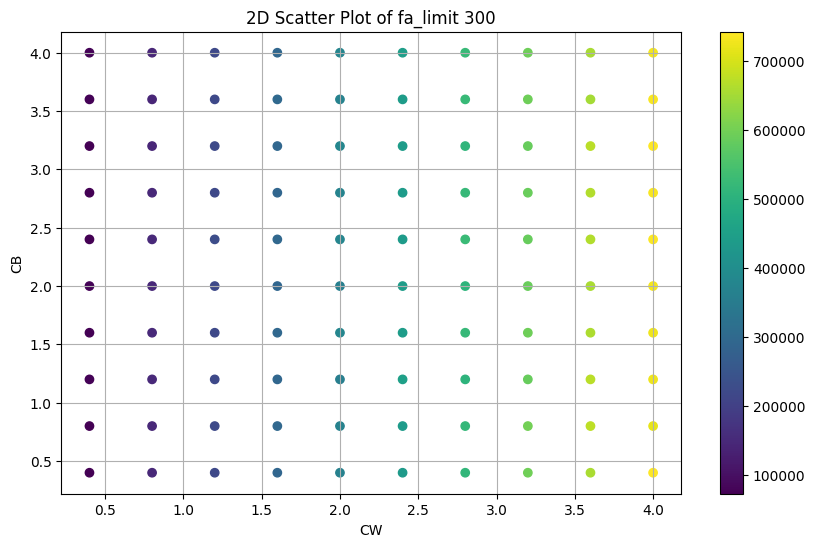

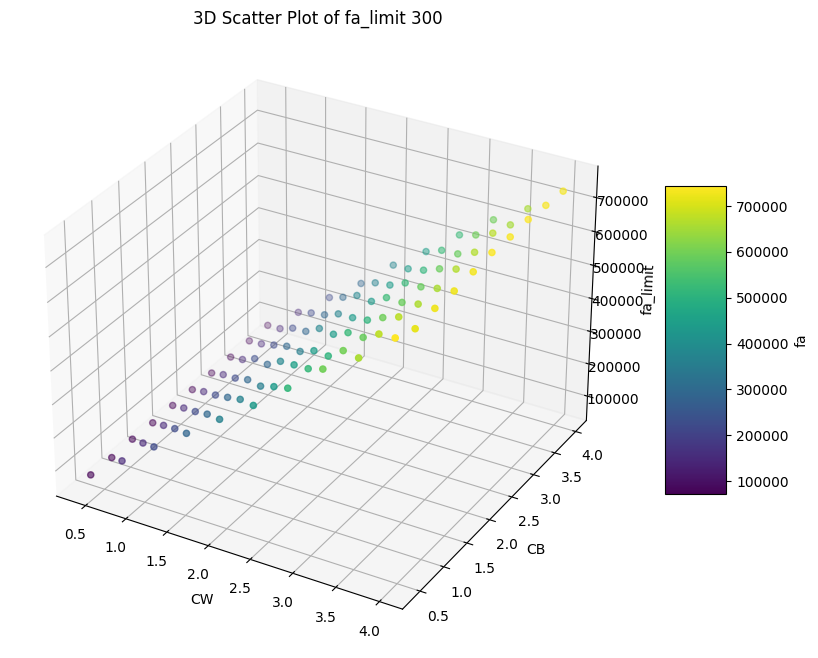

gaww average: 2.1682022475476558e-05
cw=2 cb=1 gaww average: 2.179009355613972e-05


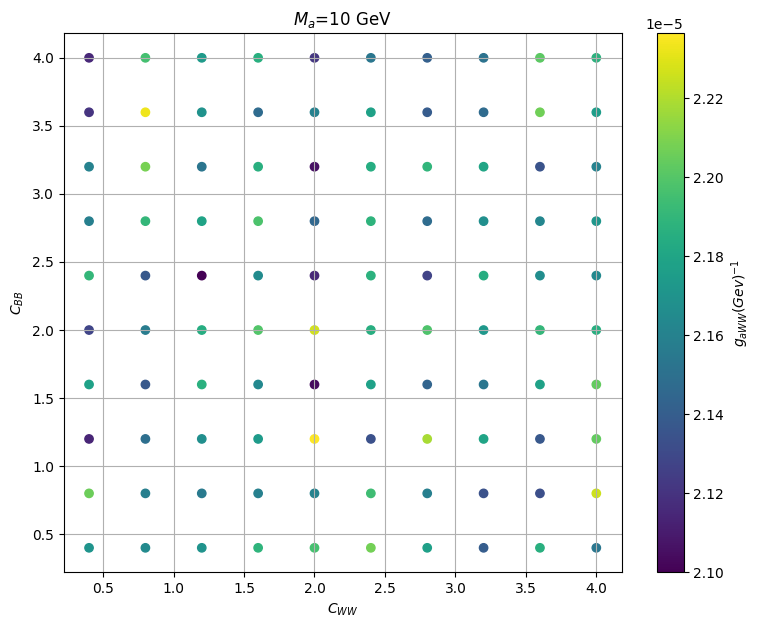

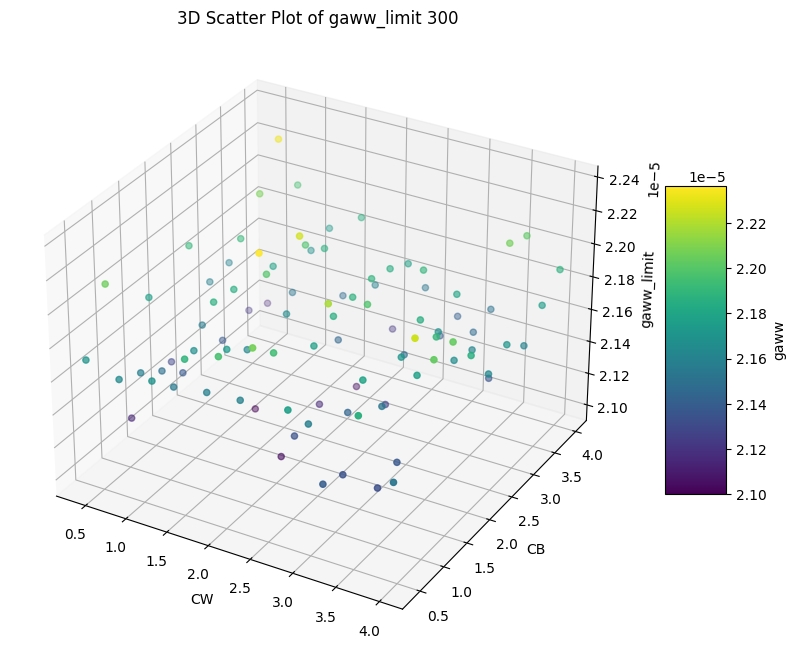

select rate average: 0.110354
cw=2 cb=1 select rate : 0.1094


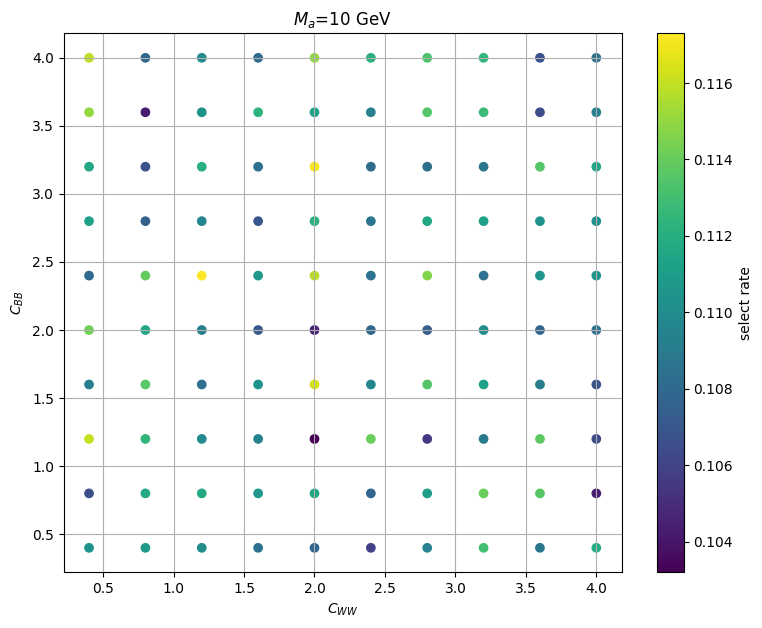

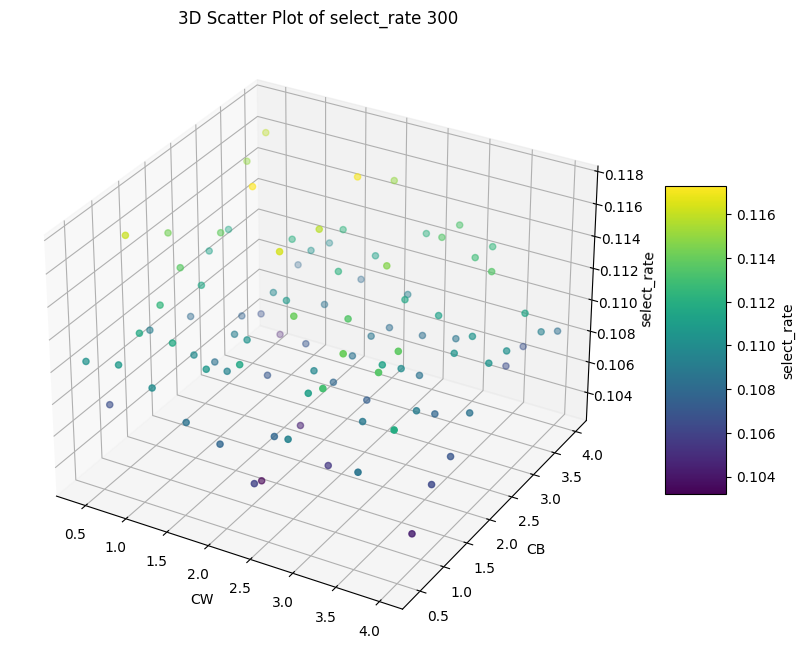

In [24]:


########################################################################



plt.figure(figsize=(10, 6))                                                   
scatter = plt.scatter(cw_values, cb_values, c=s_fa_limt_300, cmap='viridis')
plt.colorbar(scatter)
plt.title('2D Scatter Plot of fa_limit 300')
plt.xlabel('CW')
plt.ylabel('CB')
plt.grid(True)
plt.show()




fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(cw_values, cb_values, s_fa_limt_300, c=s_fa_limt_300, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, s_fa_limt_300, c=s_fa_limt_300, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, fa_limt_3000, c=fa_limt_3000, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, s_fa_limt_3000, c=s_fa_limt_3000, cmap='viridis')

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('fa')


ax.set_xlabel('CW')
ax.set_ylabel('CB')
ax.set_zlabel('fa_limit')

ax.set_title('3D Scatter Plot of fa_limit 300')
plt.show()


######################################################################## 2D

gaww_limt_300_ave = np.mean(s_gaww_limt_300)
print('gaww average:',gaww_limt_300_ave)
print('cw=2 cb=1 gaww average:',2.179009355613972e-05)

plt.figure(figsize=(9, 7))
scatter = plt.scatter(cw_values, cb_values, c=s_gaww_limt_300, cmap='viridis')
gaww_bar = plt.colorbar(scatter)
gaww_bar.set_label(r"$g_{aWW}(Gev)^{-1}$")
plt.title(r"$M_{a}$=10 GeV")
plt.xlabel(r"$C_{WW}$")
plt.ylabel(r"$C_{BB}$")
plt.grid(True)
plt.show()


########################################################################

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(cw_values, cb_values, s_gaww_limt_300, c=s_gaww_limt_300, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, s_gaww_limt_300, c=s_gaww_limt_300, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, gaww_limt_3000, c=gaww_limt_3000, cmap='viridis')
# scatter = ax.scatter(cw_values, cb_values, s_gaww_limt_3000, c=s_gaww_limt_3000, cmap='viridis')

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('gaww')

ax.set_xlabel('CW')
ax.set_ylabel('CB')
ax.set_zlabel('gaww_limit')

ax.set_title('3D Scatter Plot of gaww_limit 300')
plt.show()

######################################################################## 2D

select_rate_300_ave = np.mean(select_rate_300)
print('select rate average:',select_rate_300_ave)
print('cw=2 cb=1 select rate :',0.1094)


plt.figure(figsize=(9, 7))
scatter = plt.scatter(cw_values, cb_values, c=select_rate_300, cmap='viridis')
sel_bar=plt.colorbar(scatter)
sel_bar.set_label('select rate')
plt.title(r"$M_{a}$=10 GeV")
plt.xlabel(r"$C_{WW}$")
plt.ylabel(r"$C_{BB}$")
plt.grid(True)
plt.show()

########################################################################


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(cw_values, cb_values, select_rate_300, c=select_rate_300, cmap='viridis')

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label('select_rate')

ax.set_xlabel('CW')
ax.set_ylabel('CB')
ax.set_zlabel('select_rate')

ax.set_title('3D Scatter Plot of select_rate 300')
plt.show()


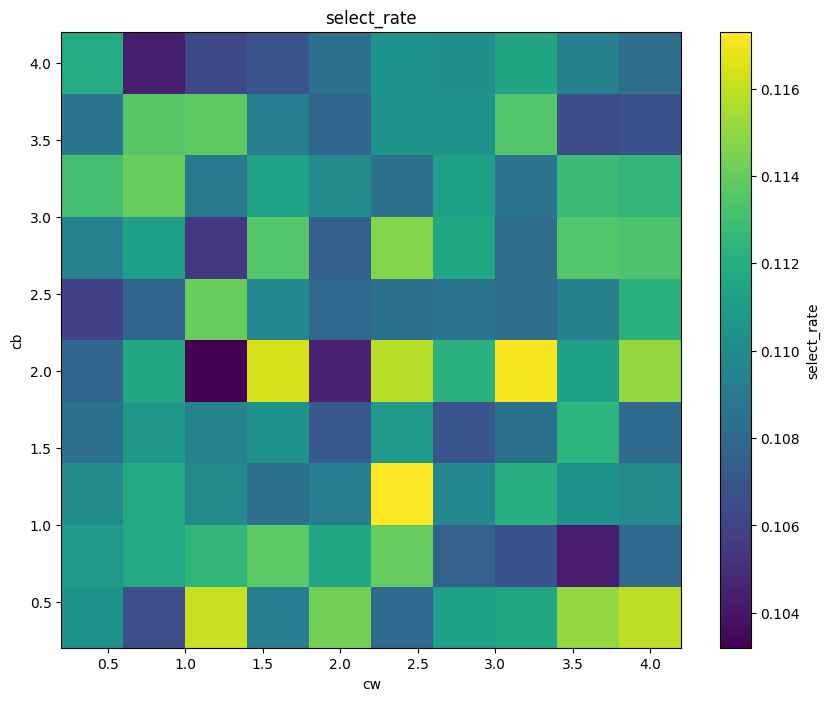

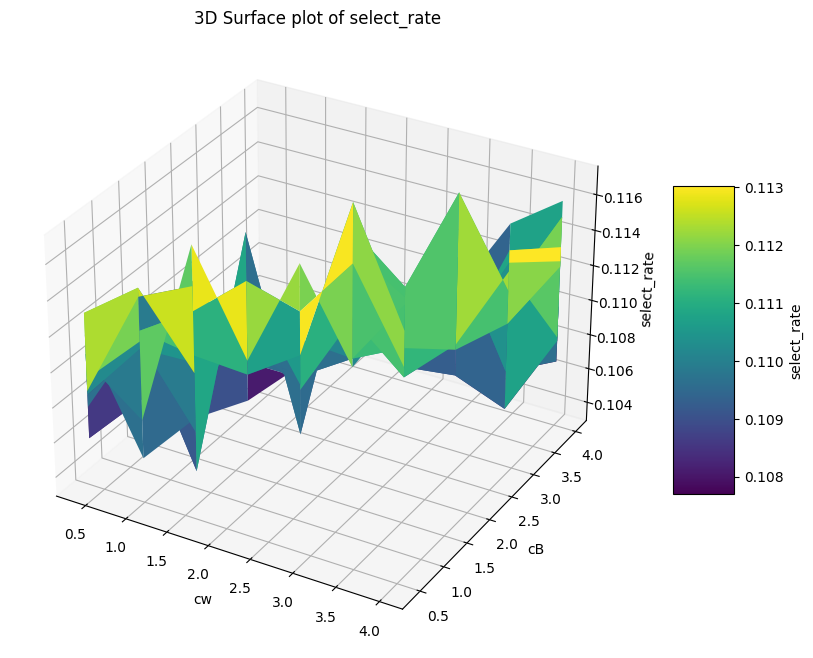

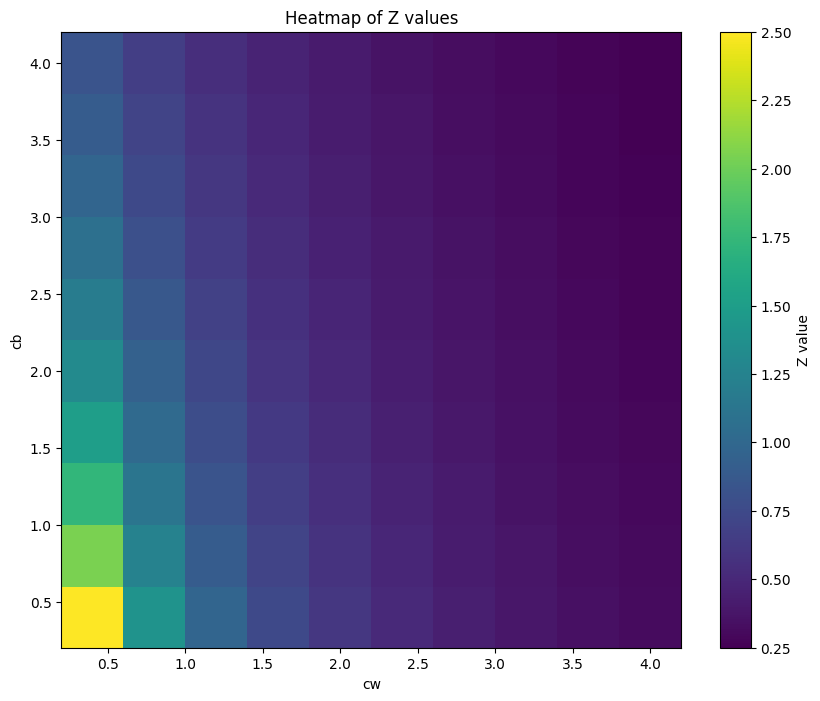

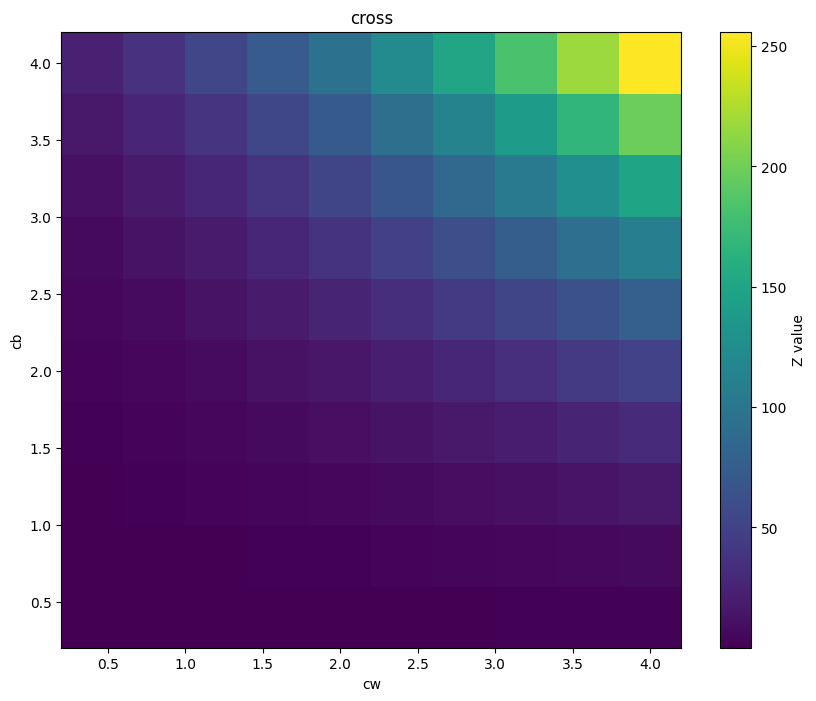

[[0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2]
 [1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.6]
 [2.  2.  2.  2.  2.  2.  2.  2.  2.  2. ]
 [2.4 2.4 2.4 2.4 2.4 2.4 2.4 2.4 2.4 2.4]
 [2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8 2.8]
 [3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2 3.2]
 [3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6 3.6]
 [4.  4.  4.  4.  4.  4.  4.  4.  4.  4. ]]
[[0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]
 [0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]
 [0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]
 [0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]
 [0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]
 [0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]
 [0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]
 [0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]
 [0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]
 [0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]]
[[ 0.16  0.32  0.48  0.64  0.8   0.96  1.12  1.28  1.44  1.6 ]
 [ 0.32  0.64  0.96  1.28  1.6   1.92  2.24  2.56  2.88  3.2 ]
 [ 0.48  0.9

In [8]:

import numpy as np
import matplotlib.pyplot as plt


cw_start = 0.4
cb_start = 0.4
step = 0.4
num_points = 10



cw_val = np.array([cw_start + i * step for i in range(num_points)])
cb_val = np.array([cb_start + j * step for j in range(num_points)])
cw_grid, cb_grid = np.meshgrid(cw_val, cb_val, indexing='ij')
garr = (cb_grid * (1 - 0.22290) + cw_grid * 0.22290)
z_grid = 1/(garr)


select_rate_300_np = np.array(select_rate_300)
select_rate_300_np = select_rate_300_np.reshape((10,10))
plt.figure(figsize=(10, 8))
c = plt.pcolormesh(cw_val, cb_val, select_rate_300_np, shading='auto') 
plt.colorbar(c, label='select_rate')
plt.title('select_rate')
plt.xlabel('cw')
plt.ylabel('cb')
plt.show()

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(cw_val, cb_val, select_rate_300_np, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='select_rate')
ax.set_title('3D Surface plot of select_rate')
ax.set_xlabel('cw')
ax.set_ylabel('cB')
ax.set_zlabel('select_rate')
plt.show()


plt.figure(figsize=(10, 8))
c = plt.pcolormesh(cw_val, cb_val, z_grid, shading='auto')
plt.colorbar(c, label='Z value')
plt.title('Heatmap of Z values')
plt.xlabel('cw')
plt.ylabel('cb')
plt.show()


plt.figure(figsize=(10, 8))
c = plt.pcolormesh(cw_val, cb_val, (cw_grid*garr)**2, shading='auto')
plt.colorbar(c, label='Z value')
plt.title('cross')
plt.xlabel('cw')
plt.ylabel('cb')
plt.show()

print(cw_grid)
print(cb_grid)
print(cw_grid*cb_grid)

print(z_grid.shape)

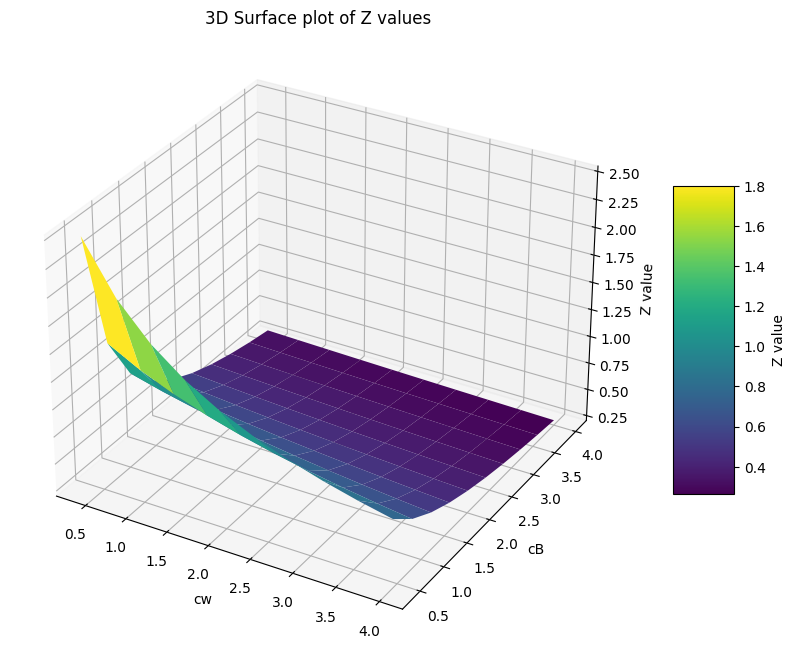

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(cw_grid, cb_grid, z_grid, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Z value')
ax.set_title('3D Surface plot of Z values')
ax.set_xlabel('cw')
ax.set_ylabel('cB')
ax.set_zlabel('Z value')
plt.show()
